## **Social Network Analysis Wih Movielens 1M Dataset**

# Load the dataset and sample

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_ratings = pd.read_csv('https://raw.githubusercontent.com/droideronline/Business-Analytics-Movielens-Analysis/main/ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
df_users = pd.read_csv('https://raw.githubusercontent.com/droideronline/Business-Analytics-Movielens-Analysis/main/users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')
df_movies = pd.read_csv('https://raw.githubusercontent.com/droideronline/Business-Analytics-Movielens-Analysis/main/movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python', encoding='ISO-8859-1')

df_ratings = df_ratings.sample(n=20000 , random_state=42)

# PreProcessing

In [ ]:
# Merge the ratings dataset with the users dataset
df_merged = pd.merge(df_ratings, df_users, on='user_id')

# Merge the merged dataset with the movies dataset
df_merged = pd.merge(df_merged, df_movies, on='movie_id')


In [ ]:
df_merged

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip_code,title,genres
0,5412,2683,2,960243649,M,25,12,97330,Austin Powers: The Spy Who Shagged Me (1999),Comedy
1,545,2683,4,976071088,M,35,17,01890,Austin Powers: The Spy Who Shagged Me (1999),Comedy
2,3626,2683,5,966595737,M,25,17,75075,Austin Powers: The Spy Who Shagged Me (1999),Comedy
3,2951,2683,5,971216337,F,35,14,94303,Austin Powers: The Spy Who Shagged Me (1999),Comedy
4,554,2683,3,976056865,M,25,12,94086,Austin Powers: The Spy Who Shagged Me (1999),Comedy
...,...,...,...,...,...,...,...,...,...,...
19995,1026,3902,5,975378422,F,45,0,19130,Goya in Bordeaux (Goya en Bodeos) (1999),Drama
19996,4011,1336,2,965543298,M,25,17,85210,Body Parts (1991),Horror
19997,5509,567,5,959721642,M,25,0,11215,Kika (1993),Drama
19998,1743,3857,2,975535752,M,35,17,77566,Bless the Child (2000),Thriller


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['timestamp', 'title', 'genres', 'zip_code','gender', 'occupation']
df_merged = df_merged.drop(columns=columns_to_drop)


In [ ]:
# Check for missing values
print(df_merged.isnull().sum())

# Fill missing values with a default value (e.g., 'Unknown')
df_merged = df_merged.fillna('Unknown')

# Remove rows with missing values
df_merged = df_merged.dropna()


user_id     0
movie_id    0
rating      0
age         0
dtype: int64


In [ ]:
df_merged

,user_id,movie_id,rating,age
0,5412,2683,2,25
1,545,2683,4,35
2,3626,2683,5,25
3,2951,2683,5,35
4,554,2683,3,25
...,...,...,...,...
19995,1026,3902,5,45
19996,4011,1336,2,25
19997,5509,567,5,25
19998,1743,3857,2,35


# Filter data based on rating count

In [ ]:
user_rating_counts = df_merged['user_id'].value_counts()
filtered_users = user_rating_counts[user_rating_counts >= 20].index
df_filtered = df_merged[df_merged['user_id'].isin(filtered_users)]


In [ ]:
df_filtered.shape

(1729, 4)

In [ ]:
df_filtered

,user_id,movie_id,rating,age
2,3626,2683,5,25
27,1733,2745,4,18
39,195,1690,3,25
61,4305,1196,5,45
63,5831,1196,4,25
...,...,...,...,...
19710,3778,3672,2,25
19757,3778,328,2,25
19793,2063,2498,2,25
19794,2063,1519,2,25


# Visualisation of Netowork



In [ ]:
import networkx as nx

G = nx.Graph()


In [ ]:
# Add nodes for users
user_ids = df_filtered['user_id'].unique()
G.add_nodes_from(user_ids)


In [ ]:
from itertools import combinations

# Create edges: Iterate over the preprocessed dataset and create edges between users who have rated the same movie
for movie_id, group in df_filtered.groupby('movie_id'):
    users_rated = set(group['user_id'])
    user_pairs = combinations(users_rated, 2)
    for u, v in user_pairs:
        G.add_edge(u, v)

In [ ]:
# Example: Compute degree centrality
degree_centrality = nx.degree_centrality(G)


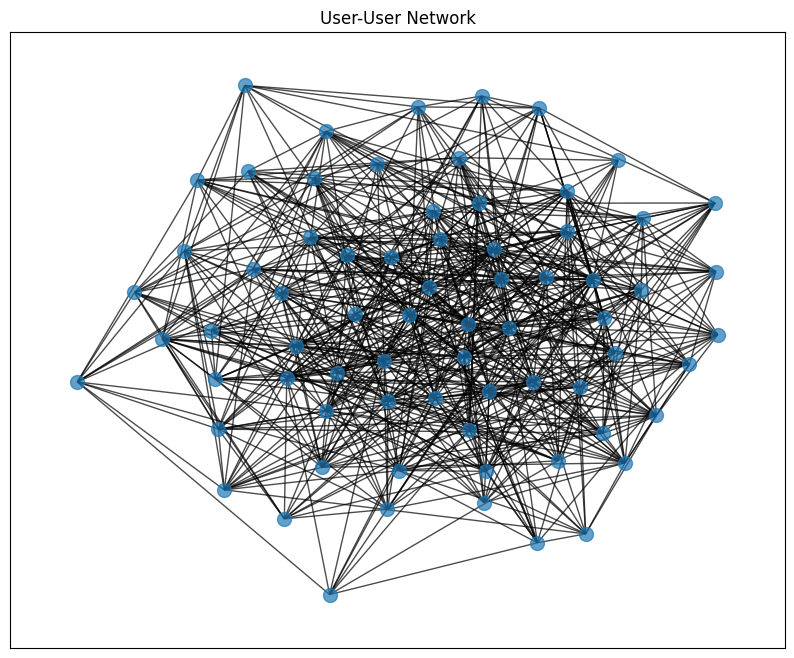

In [ ]:
#visualize the network
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=False, node_size=100, alpha=0.7)
plt.title('User-User Network')
plt.show()


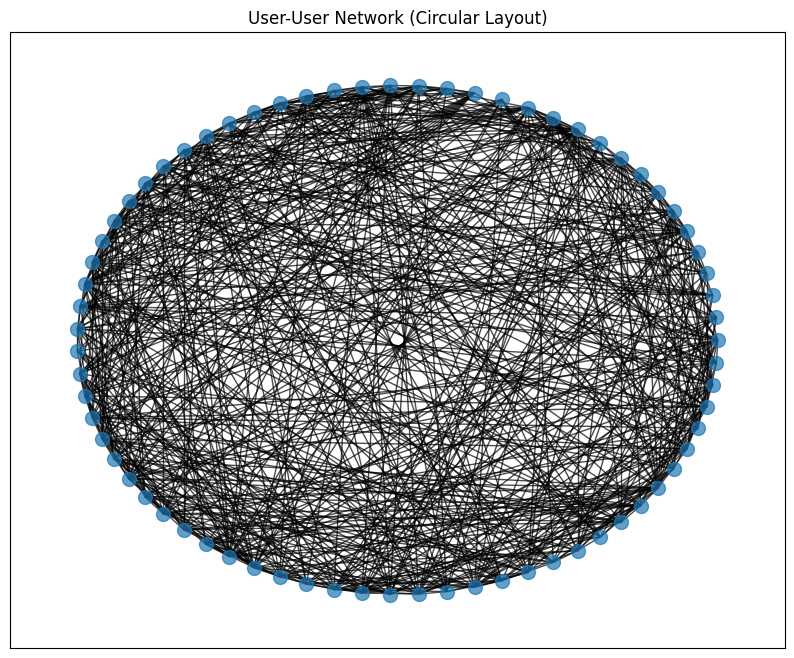

In [ ]:
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=100, alpha=0.7)
plt.title('User-User Network (Circular Layout)')
plt.show()


# Network Analytics

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)
density = nx.density(G)
print("Graph Density:", density)
diameter = nx.diameter(G)
print("Graph Diameter:", diameter)


Number of Nodes: 71
Number of Edges: 637
Graph Density: 0.2563380281690141
Graph Diameter: 3


The network consists of 71 users who have rated movies in common, connected by 637 edges. With a graph density of 0.2563, there is a moderate level of connectivity among users based on their movie preferences. The graph diameter of 3 indicates that users are not too distant from each other in terms of shared movie preferences. These findings suggest that there is some level of similarity or interaction between users, facilitating the spread of information and recommendations within the network. This analysis provides valuable insights into user behavior and can inform recommendation strategies in the context of movie ratings.

# Centrality Properties

In [ ]:
# Degree Centrality
degree_centralities = nx.degree_centrality(G)
print("Centrality Measures - Degree Centrality:")
for node, centrality in list(degree_centralities.items())[:10]:
    print(f"Node {node}: {centrality}")

# Betweenness Centrality
betweenness_centralities = nx.betweenness_centrality(G)
print("\nCentrality Measures - Betweenness Centrality:")
for node, centrality in list(betweenness_centralities.items())[:10]:
    print(f"Node {node}: {centrality}")

# Closeness Centrality
closeness_centralities = nx.closeness_centrality(G)
print("\nCentrality Measures - Closeness Centrality:")
for node, centrality in list(closeness_centralities.items())[:10]:
    print(f"Node {node}: {centrality}")

# Eigenvector Centrality
eigenvector_centralities = nx.eigenvector_centrality(G)
print("\nCentrality Measures - Eigenvector Centrality:")
for node, centrality in list(eigenvector_centralities.items())[:10]:
    print(f"Node {node}: {centrality}")

# PageRank Centrality
pagerank_centralities = nx.pagerank(G)
print("\nCentrality Measures - PageRank Centrality:")
for node, centrality in list(pagerank_centralities.items())[:10]:
    print(f"Node {node}: {centrality}")


Centrality Measures - Degree Centrality:
Node 3626: 0.3
Node 1733: 0.17142857142857143
Node 195: 0.17142857142857143
Node 4305: 0.17142857142857143
Node 5831: 0.19999999999999998
Node 4277: 0.34285714285714286
Node 4386: 0.2714285714285714
Node 1635: 0.22857142857142856
Node 1941: 0.12857142857142856
Node 5394: 0.3

Centrality Measures - Betweenness Centrality:
Node 3626: 0.011873593233979596
Node 1733: 0.004676023005580373
Node 195: 0.0032104528813332
Node 4305: 0.0059681139181642605
Node 5831: 0.0062347236542175735
Node 4277: 0.01937732586934665
Node 4386: 0.009232017753722229
Node 1635: 0.008372012442987265
Node 1941: 0.002596928360016204
Node 5394: 0.01685937172063375

Centrality Measures - Closeness Centrality:
Node 3626: 0.5882352941176471
Node 1733: 0.5426356589147286
Node 195: 0.5426356589147286
Node 4305: 0.5384615384615384
Node 5831: 0.5555555555555556
Node 4277: 0.603448275862069
Node 4386: 0.5785123966942148
Node 1635: 0.5645161290322581
Node 1941: 0.5185185185185185
Node 5

In [ ]:
# Average Clustering Coefficient
average_clustering_coefficient = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient: {average_clustering_coefficient}")


# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print(f"\nAssortativity: {assortativity}")

# Average Shortest Path Length
average_shortest_path_length = nx.average_shortest_path_length(G)
print(f"\nAverage Shortest Path Length: {average_shortest_path_length}")



Average Clustering Coefficient: 0.2982022454333856

Assortativity: -0.01250511354939579

Average Shortest Path Length: 1.752917505030181


The average clustering coefficient of 0.2982 suggests that there is a moderate level of clustering or grouping of users in the network. This indicates that users tend to have connections with other users who share similar movie preferences. The negative assortativity coefficient (-0.0125) suggests a slight tendency for users to connect with others who have a different degree of connectivity. In other words, users with higher degrees of connections are more likely to connect with users who have lower degrees of connections.

The average shortest path length of 1.7529 indicates that, on average, it takes approximately 1.75 steps for information or recommendations to reach any user in the network. This suggests that there is a relatively efficient flow of information within the network, allowing for the dissemination of movie preferences and recommendations among users.

# Community Detection

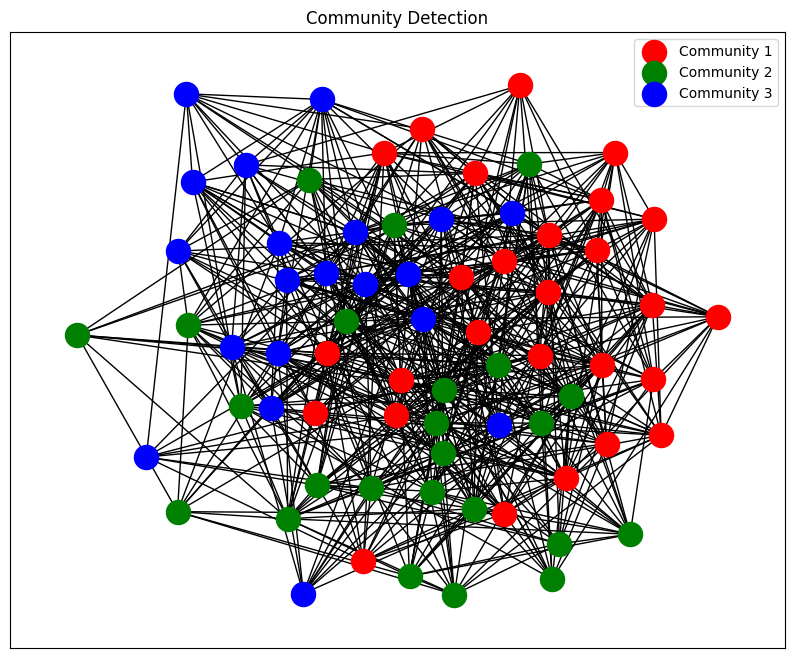

Community 1 size: 27
Community 2 size: 24
Community 3 size: 20


In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

# Apply the greedy modularity communities algorithm for community detection
communities = greedy_modularity_communities(G)

# Visualize the communities
pos = nx.spring_layout(G)  # Layout algorithm for node positioning
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']  # Assign colors to communities
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i], label=f"Community {i+1}")
nx.draw_networkx_edges(G, pos)
plt.title('Community Detection')
plt.legend()
plt.show()
# print no of nodes in  each communtity
for i, community in enumerate(communities):
    community_size = len(community)
    print(f"Community {i+1} size: {community_size}")


After applying the greedy modularity communities algorithm for community detection in the social network, we visualized the communities and assigned different colors to each community. The detected communities represent distinct groups within the network, with varying sizes indicating different levels of connectivity and interaction. The visualization helps identify the boundaries and connections between communities, revealing patterns of information flow and potential network hubs. This analysis provides insights into the social structure of the network and highlights cohesive groups and their interactions.